In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [7]:
responses = pd.read_excel('masculinity-responses-renamed.xlsx')

In [5]:
responses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1615 entries, 1 to 1615
Data columns (total 97 columns):
StartDate                    1615 non-null datetime64[ns]
EndDate                      1615 non-null datetime64[ns]
self_manly                   1615 non-null object
others_manly                 1615 non-null object
source_ideas_father          1615 non-null object
source_ideas_mother          1615 non-null object
source_ideas_family          1615 non-null object
source_ideas_popculture      1615 non-null object
source_ideas_friends         1615 non-null object
source_ideas_other           1615 non-null object
societal_pressure            1615 non-null object
prof_advice                  1615 non-null object
personal_advice              1615 non-null object
phys_aff                     1615 non-null object
cry                          1615 non-null object
phys_fight                   1615 non-null object
sex_women                    1615 non-null object
sex_men                    

In [4]:
responses.shape

(1615, 97)

Here is the breakdown of answers to the first question: 
>In general, how masculine or 'manly' do you feel?

In [6]:
responses['self_manly'].value_counts()

Somewhat masculine      826
Very masculine          612
Not very masculine      131
Not at all masculine     32
No answer                14
Name: self_manly, dtype: int64

In [77]:
responses = responses[responses.self_manly != 'No answer']

In [8]:
responses = responses[responses.others_manly != 'No answer']

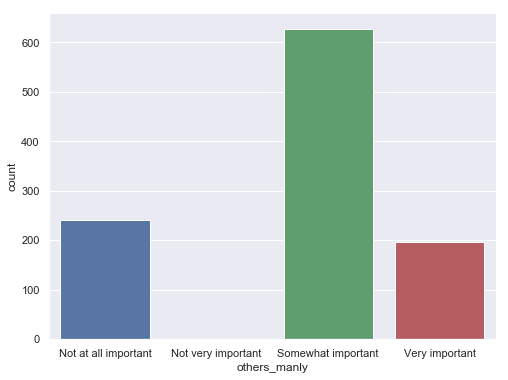

In [9]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="others_manly", data=responses, 
                   order = ['Not at all important', 'Not very important', 'Somewhat important', 'Very important'])

In [10]:
responses['others_manly'] = responses['others_manly'].map({'Not at all important':0, 
                                                           'Not too important':1, 
                                                           'Somewhat important':2, 
                                                           'Very important':3})

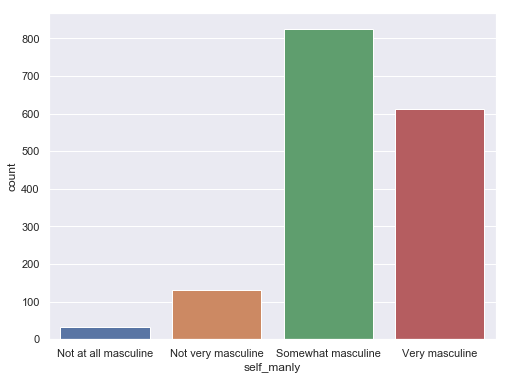

In [54]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="self_manly", data=responses, order = ['Not at all masculine', 'Not very masculine', 'Somewhat masculine', 'Very masculine'])

I also needed to decide how to make these parseable- should I map each response to a numeric value, or create dummy columns? 
<br>The response options were on a graded scale, from 'Not at all' to 'Very', so I decided to map to numeric values (0-3)

In [78]:
responses['self_manly'] = responses['self_manly'].map({'Not at all masculine':0, 
                                                       'Not very masculine':1, 
                                                       'Somewhat masculine':2,
                                                        'Very masculine': 3})

Limitations of dataset:
Only 1615 responses, collected in what is likely a non-representative sample of the population of men in the US
Show distribution of age, race, region, orientation answers?

### Can the race, sexual orientation, age range and region of the respondent predict how masculine they feel?

In [ ]:
worry_cols = ['worry_height', 'worry_weight', 'worry_hair', 'worry_physique', 'worry_genitalia', 'worry_style', 
              'worry_sex', 'worry_mental_health', 'worry_phys_health', 'worry_finances', 'worry_provide', 'no_worries']

In [ ]:
for col in worry_cols:
    responses[col] = responses[col].map({'Not selected': 0})
    
responses[worry_cols] = responses[worry_cols].fillna(1)

#responses['insecurity_score'] = responses[worry_cols].sum(axis=1)

In [ ]:
emo_cols = ['prof_advice', 'personal_advice', 'phys_aff', 'cry', 'therapist', 'lonely']

In [ ]:
for col in emo_cols:
    responses[col] = responses[col].map({'No answer': 0,
                                        'Never, and not open to it':1,
                                        'Never, but open to it':2,
                                        'Rarely':3,
                                        'Sometimes':4,
                                        'Often':5})
    
#responses['emotional_score'] = responses[emo_cols].sum(axis=1)

In [11]:
responses = responses[['race', 'orientation.1', 'age3', 'region', 'others_manly']]

In [12]:
responses.shape

(1606, 5)

In [13]:
responses[['race', 'orientation.1', 'age3', 'region']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1606 entries, 1 to 1615
Data columns (total 4 columns):
race             1606 non-null object
orientation.1    1606 non-null object
age3             1606 non-null object
region           1586 non-null object
dtypes: object(4)
memory usage: 142.7+ KB


In [14]:
responses['race'].value_counts()

White       1345
Other         82
Black         72
Hispanic      71
Asian         36
Name: race, dtype: int64

In [15]:
responses['orientation.1'].value_counts()

Straight        1403
Gay/Bisexual     160
Other             31
No answer         12
Name: orientation.1, dtype: int64

In [16]:
skips = responses['orientation.1'] == 'No answer'

In [17]:
responses.loc[skips, 'orientation.1'] = 'Other'

In [18]:
responses['orientation.1'].value_counts()

Straight        1403
Gay/Bisexual     160
Other             43
Name: orientation.1, dtype: int64

In [19]:
responses['age3'].value_counts()

35 - 64      846
65 and up    627
18 - 34      133
Name: age3, dtype: int64

In [20]:
responses['region'].value_counts()

South Atlantic        301
Pacific               279
East North Central    232
Middle Atlantic       223
West South Central    153
Mountain              147
West North Central    114
New England            78
East South Central     59
Name: region, dtype: int64

In [21]:
responses['region'].unique()

array(['Middle Atlantic', 'East North Central', 'West North Central',
       'Pacific', 'South Atlantic', nan, 'New England', 'Mountain',
       'West South Central', 'East South Central'], dtype=object)

In [22]:
responses.dropna(subset =['region'], inplace = True)

### Get dummies for all

In [23]:
race_dummies = pd.get_dummies(responses['race'], prefix = 'race', drop_first = True)

In [24]:
orientation_dummies = pd.get_dummies(responses['orientation.1'], prefix = 'orientation', drop_first = True)

In [25]:
age_dummies = pd.get_dummies(responses['age3'], prefix = 'age', drop_first = True)

In [26]:
region_dummies = pd.get_dummies(responses['region'], prefix = 'region', drop_first = True)

### Set up X and y values

In [27]:
X = pd.concat([race_dummies, orientation_dummies, age_dummies, region_dummies], axis = 'columns')

In [28]:
y = responses['others_manly']

### Train-test split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [30]:
logreg = LogisticRegression()

In [31]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
y_pred = logreg.predict(X_test)

In [33]:
from sklearn import metrics

In [34]:
metrics.accuracy_score(y_pred, y_test)

0.345088161209068

In [35]:
cm = metrics.confusion_matrix(y_test, y_pred)

Text(0.5,12.5,'Predicted label')

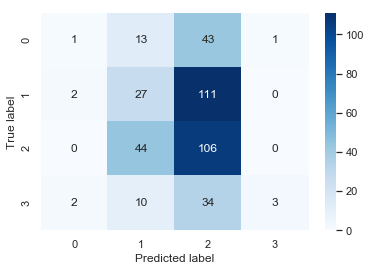

In [36]:
ax = sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')

In [37]:
y_test.value_counts()

2    150
1    140
0     58
3     49
Name: others_manly, dtype: int64

In [38]:
y_null = np.full(y_test.shape, 2)

In [39]:
metrics.accuracy_score(y_null, y_test)

0.3778337531486146

### Cross Val Score

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
cross_val_score(LogisticRegression(solver='lbfgs'), X, y, cv=10).mean()

0.383261189293073

### KNN

In [42]:
knn = KNeighborsClassifier()

In [43]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [44]:
y_pred = knn.predict(X_test)

In [45]:
metrics.accuracy_score(y_pred, y_test)

0.3198992443324937

In [46]:
cm = metrics.confusion_matrix(y_test, y_pred)

Text(0.5,17.2,'Predicted label')

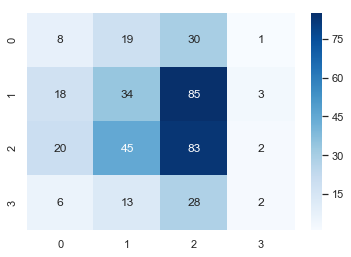

In [47]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')

### Deal with filling region values later

In [61]:
skips.value_counts()

False    1581
True       20
Name: region, dtype: int64

In [62]:
responses[skips]['state']

14          California
145         California
292          Tennessee
297               Ohio
317           New York
319       Pennsylvania
371         California
378         California
438      West Virginia
731            Wyoming
850           Colorado
906       Pennsylvania
1207          Delaware
1282             Texas
1346    North Carolina
1353          New York
1430           Georgia
1471        Washington
1587         Wisconsin
1612          Colorado
Name: state, dtype: object

In [75]:
wnc = responses['region'] == 'West North Central'
wnc_region = responses[wnc]['state'].unique()

In [76]:
ne = responses['region'] == 'New England'
ne_region = responses[ne]['state'].unique()

In [77]:
mount = responses['region'] == 'Mountain'
mount_region = responses[mount]['state'].unique()

In [78]:
wsc = responses['region'] == 'West South Central'
wsc_region = responses[wsc]['state'].unique()

In [79]:
esc = responses['region'] == 'East South Central'
esc_region = responses[esc]['state'].unique()

In [80]:
pac = responses['region'] == 'Pacific'
pac_region= responses[pac]['state'].unique()

In [83]:
mid = responses['region'] == 'Middle Atlantic'
mid_region = responses[mid]['state'].unique()

In [84]:
s_at = responses['region'] == 'South Atlantic'
s_at_region = responses[s_at]['state'].unique()

In [85]:
enc = responses['region'] == 'East North Central'
enc_region = responses[enc]['state'].unique()

In [88]:
region_dict = {'wnc':wnc_region,
              'ne':ne_region,
              'mount': mount_region,
              'wsc': wsc_region,
              'esc': esc_region,
              'pac': pac_region,
              'mid': mid_region,
              's_at': s_at_region,
              'enc': enc_region}

In [1]:


columns = ['a', 'b', 'c', 'd', 'e']
data = np.arange(20).reshape(5, 4) % 2
data[2, 1] = 0
df = pd.DataFrame(columns=columns, data=data)
df['d'] = None

In [2]:
df

,a,b,c,d
0,0,1,0,None
1,1,0,1,None
2,0,0,0,None


In [3]:
df['d'] = any(df.loc[:, ['a', 'b', 'c']])

In [4]:
df['d']

0    True
1    True
2    True
Name: d, dtype: bool

In [5]:
df['d'] = df.loc[:, ['a', 'b', 'c']].sum(axis=1) > 0 

In [6]:
columns = ['a', 'b', 'c']
data = np.arange(9).reshape(3, 3) % 2
data[2, 1] = 0
df = pd.DataFrame(columns=columns, data=data)

In [7]:
df

,a,b,c
0,0,1,0
1,1,0,1
2,0,0,0


In [8]:
df['d'] = df.loc[:, ['a', 'b', 'c']].sum(axis=1) > 0 

In [9]:
df

,a,b,c,d
0,0,1,0,True
1,1,0,1,True
2,0,0,0,False


In [21]:
df = pd.DataFrame(np.array([['father', 'mother', 'friends', 'pop'], 
                            ['not selected', 'not selected', 'not selected', 'not selected'], 
                            ['father', 'not selected', 'not selected', 'pop'], 
                            ['father', 'not selected', 'friends', 'not selected']]), columns = ['source_father', 'source_mother', 'source_friends', 'source_pop'])

In [22]:
df

,source_father,source_mother,source_friends,source_pop
0,father,mother,friends,pop
1,not selected,not selected,not selected,not selected
2,father,not selected,not selected,pop
3,father,not selected,friends,not selected


In [24]:
df['source_father']

0          father
1    not selected
2          father
3          father
Name: source_father, dtype: object

In [25]:
df['source_father'][1]

'not selected'

In [17]:
cols = ['source_father', 'source_mother', 'source_friends', 'source_pop']

In [9]:
df[cols].map({'not_selected': 0})

AttributeError: 'DataFrame' object has no attribute 'map'

In [18]:
for col in cols:
    df[col] = df[col].map({'not selected': 0})

In [19]:
df

,source_father,source_mother,source_friends,source_pop
0,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0
2,NaN,0.0,0.0,NaN
3,NaN,0.0,NaN,0.0


In [20]:
df[cols].fillna(1)

,source_father,source_mother,source_friends,source_pop
0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0
